## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [6]:
data = pd.read_csv("Titanic_train.csv")

In [15]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)
missing_index=data.isnull()

        missing_rate
Pclass      0.000000
Sex         0.000000
Age         0.198653


## 觀察 Age

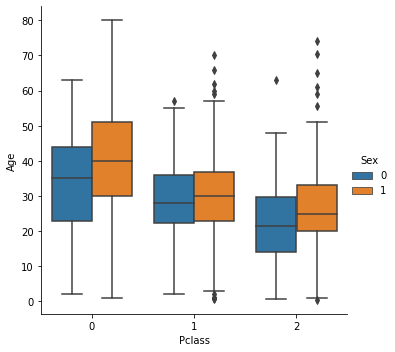

In [12]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex", kind="box",data=data)

# KNN 補值

In [16]:
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()

data['Pclass']=le.fit_transform(data['Pclass'])
data['Sex']=le.fit_transform(data['Sex'])

data = data[['Pclass','Sex','Age']]

# 設定 k 值
value_neighbors=1

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])

C:\WINDOWS\TEMP/ipykernel_9980/3524838678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pclass']=le.fit_transform(data['Pclass'])
C:\WINDOWS\TEMP/ipykernel_9980/3524838678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=le.fit_transform(data['Sex'])


,Pclass,Sex,Age
5,2,1,NaN
17,1,1,NaN
19,2,0,NaN
26,2,1,NaN
28,2,0,NaN
...,...,...,...
859,2,1,NaN
863,2,0,NaN
868,2,1,NaN
878,2,1,NaN


,0,1,2
5,2.0,1.0,22.0
17,1.0,1.0,35.0
19,2.0,0.0,26.0
26,2.0,1.0,22.0
28,2.0,0.0,26.0
...,...,...,...
859,2.0,1.0,22.0
863,2.0,0.0,26.0
868,2.0,1.0,22.0
878,2.0,1.0,22.0
